In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import autograd.tensor as tensor
import autograd.nn as nn

from autograd.optim import SGD
from autograd.validation import MSELoss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## References


### Forward mode & dual numbers

- https://en.wikipedia.org/wiki/Dual_number
- https://blog.demofox.org/2014/12/30/dual-numbers-automatic-differentiation/
- https://blog.demofox.org/2017/02/20/multivariable-dual-numbers-automatic-differentiation/
- https://marksaroufim.medium.com/automatic-differentiation-step-by-step-24240f97a6e6

### Backward mode & backpropagation

- https://www.jmlr.org/papers/volume18/17-468/17-468.pdf
- https://sidsite.com/posts/autodiff/
- https://github.com/karpathy/micrograd

### More on derivatives

- http://cs231n.stanford.edu/vecDerivs.pdf
- http://cs231n.stanford.edu/handouts/linear-backprop.pdf
- https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [3]:
class RegNet(nn.Module):
    def __init__(self, in_shape):
        super().__init__()
        
        self.l1 = nn.Linear(in_shape, 32)
        self.l2 = nn.Linear(32, 1)
                    
    def forward(self, X):
        out = self.l1(X).relu()
        return self.l2(out)

In [4]:
from sklearn.datasets import load_boston

X_, y_ = load_boston()["data"], load_boston()["target"]
X, y = tensor.Tensor(X_), tensor.Tensor(y_).reshape(-1, 1)

In [22]:
net = RegNet(X.shape[1])
optimizer = SGD(net.parameters(), lr=1e-6)

errors = []

for i in range(200):
    net.zero_grad()
        
    loss = MSELoss(net(X), y)
    errors.append(loss.value)

    loss.backward()
    optimizer.step()

print(np.sqrt(loss.value[0]))

/Users/alex/All/programming/Python/ml_practise/autograd/autograd/functional.py:96: RuntimeWarning: invalid value encountered in log
  dy = x.value ** y.value * np.log(x.value)


8.891366908526534


Text(0, 0.5, 'RMSE')

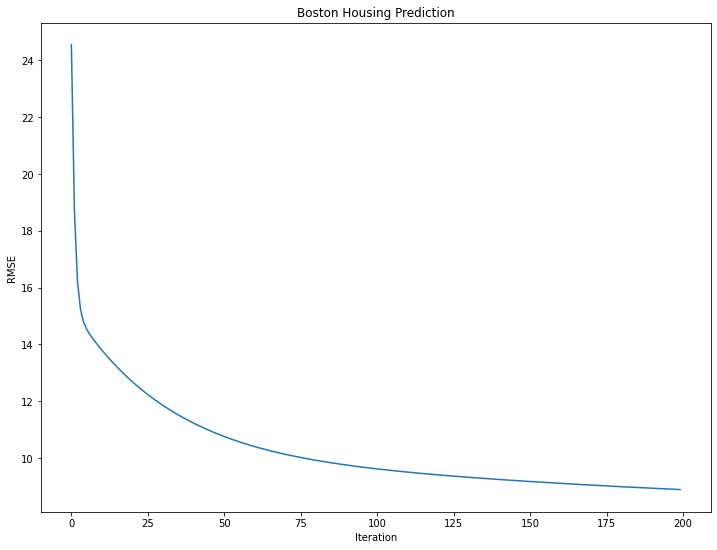

In [23]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(200), np.sqrt(errors))
plt.title("Boston Housing Prediction")
plt.xlabel("Iteration")
plt.ylabel("RMSE")